# Exam R
NAME = "Victor Digues Lacerda, #2007801#"
COLLABORATORS = "Gabriele Pelucci, #2010541#"
# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [1]:
library(tidyverse)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [2]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

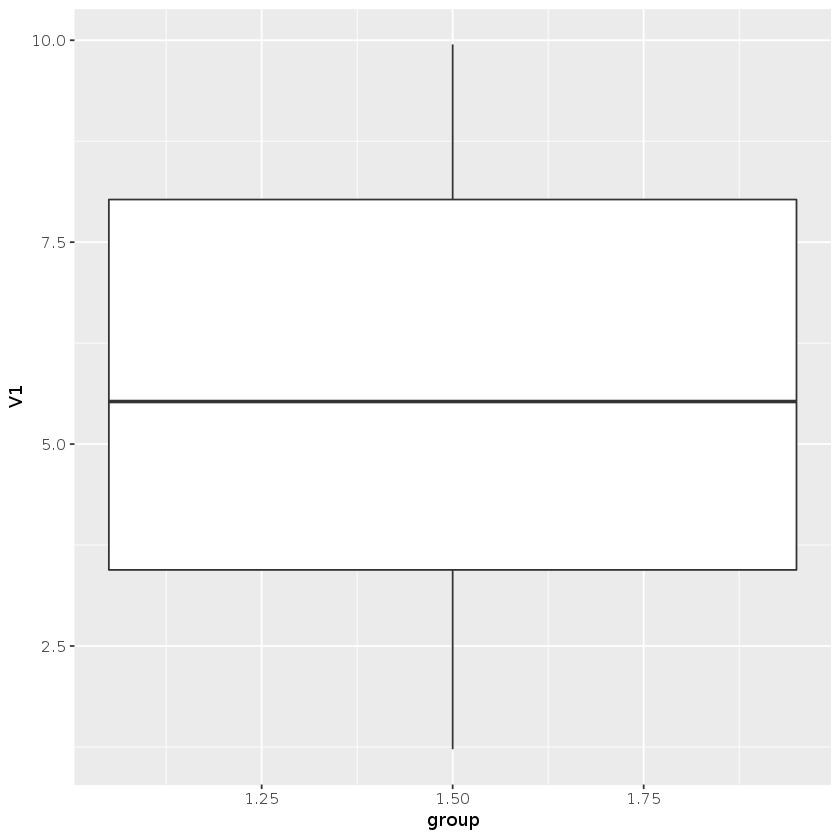

In [3]:
p <- ggplot(df1, aes(x=group, y=V1)) + 
  geom_boxplot()
p

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [4]:
reg1 <- lm(data=df1, response ~ V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [5]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



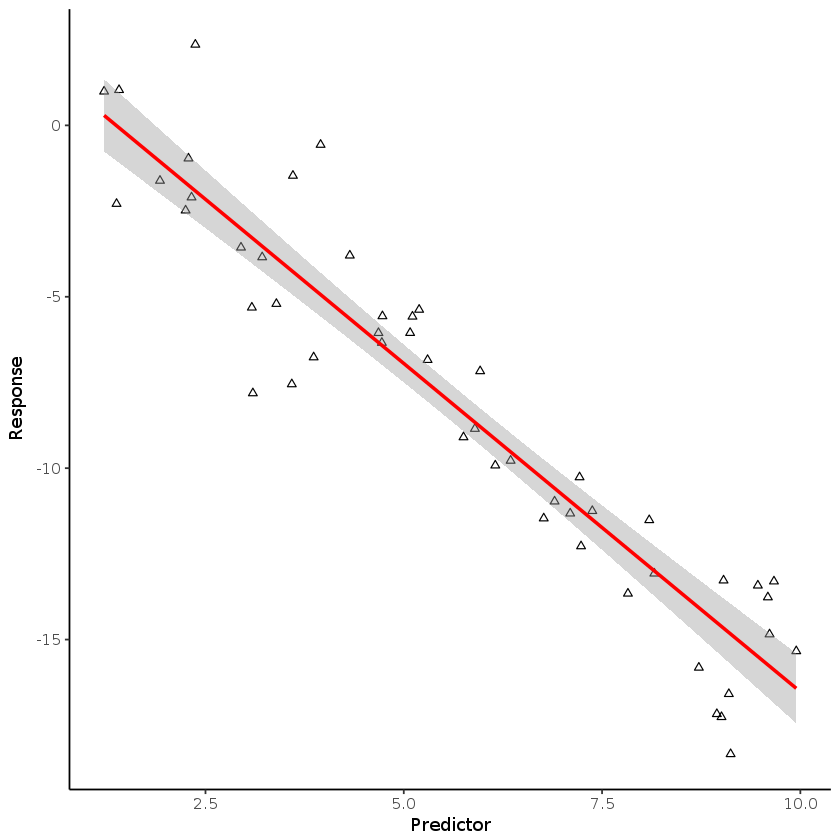

In [6]:
plot2 <-ggplot(df1, aes(x = V1, y = response)) +
  geom_point(shape=2) + geom_smooth(colour="red", method=lm) +
  xlab("Predictor") + ylab("Response") + 
  theme_classic() + scale_fill_manual(values=c("red"))

plot2

# Assigment 2

# Packages

In [7]:
library(thematicmaps)
library(tidyverse)

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [8]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

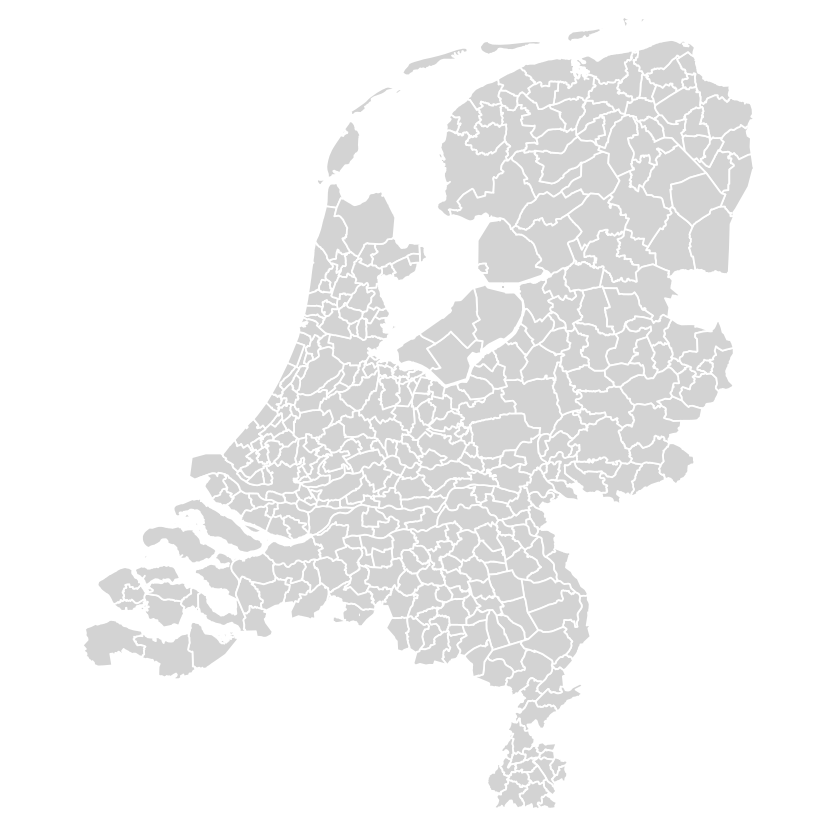

In [9]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [10]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")

str(pc4_locations)
head(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : Factor w/ 4066 levels "100024.115074611",..: 528 513 482 460 491 485 502 543 559 544 ...
 $ Y  : Factor w/ 4066 levels "308396.770615801",..: 2500 2509 2557 2552 2518 2497 2473 2487 2501 2529 ...


PC4,X,Y
1011,122244.1016908,487223.1103132
1012,121612.797805668,487555.442193927
1013,120324.504123209,489671.682341738
1014,119515.029078042,489421.741526331
1015,120740.451399318,488009.298815909
1016,120537.758537905,487075.388236409


In [11]:
pc4_locations$X <- as.numeric(as.character(pc4_locations$X))
pc4_locations$Y <- as.numeric(as.character(pc4_locations$Y))
str(pc4_locations)
head(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


PC4,X,Y
1011,122244.1,487223.1
1012,121612.8,487555.4
1013,120324.5,489671.7
1014,119515.0,489421.7
1015,120740.5,488009.3
1016,120537.8,487075.4


## Assignment 2d

### 2di

Read in the school data


In [12]:
schools <- read.csv2("../Sourcedata/schools.csv")
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [58]:
str(schools1)

'data.frame':	1603 obs. of  32 variables:
 $ PROVINCIE                                 : Factor w/ 13 levels "                    ",..: 1 2 2 2 2 2 2 2 2 2 ...
 $ BEVOEGD.GEZAG.NUMMER                      : int  41152 10053 10053 13273 13273 13273 13273 13273 13273 13273 ...
 $ BRIN.NUMMER                               : Factor w/ 652 levels "00AH","00AQ",..: 534 382 382 490 490 490 490 490 490 490 ...
 $ VESTIGINGSNUMMER                          : Factor w/ 1603 levels "00AH00","00AH07",..: 1366 965 966 1252 1253 1254 1255 1256 1257 1258 ...
 $ VESTIGINGSNAAM                            : Factor w/ 977 levels "'s Gravendreef College voor vbo, mavo en havo",..: 681 800 800 583 583 583 583 583 583 583 ...
 $ STRAATNAAM                                : Factor w/ 1308 levels "                        ",..: 1 1293 143 778 1017 330 1078 512 300 9 ...
 $ HUISNUMMER.TOEVOEGING                     : Factor w/ 322 levels "            ",..: 1 113 102 316 2 102 83 162 162 305 ...
 $ POSTCODE       

In [61]:
PC4 <- substr(schools$POSTCODE, 1,5)


schools1 <- schools %>%
    mutate(PC4 = PC4)

        
head(schools1)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM,PC4
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,,NA,,NA,,NA,,NA,,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,9406
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,9401
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,9402
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe,9331
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe,9411


In [14]:
select(schools1,DENOMINATIE, PC4)

DENOMINATIE,PC4
Openbaar,
Openbaar,9406
Openbaar,9401
Openbaar,9402
Openbaar,9331
Openbaar,9411
Openbaar,9461
Openbaar,9402
Openbaar,9402
Openbaar,9403


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [72]:
schools1$PC4 <- as.numeric(schools1$PC4)
x <- inner_join(pc4_locations, schools1, by="PC4")

school_loc <- data.frame(x$PC4, x$DENOMINATIE) 
    

head(school_loc)

x.PC4,x.DENOMINATIE
1013,Algemeen bijzonder
1013,"Samenwerking PC, RK"
1014,"Samenwerking PC, RK"
1014,Algemeen bijzonder
1016,Algemeen bijzonder
1017,Openbaar


In [75]:
c <- subset(school_loc,x.DENOMINATIE=="Protestants-Christelijk") & subset(school_loc,x.DENOMINATIE=="Rooms-Katholiek")

,x.PC4,x.DENOMINATIE
29,1065,Protestants-Christelijk
53,1077,Protestants-Christelijk
57,1081,Protestants-Christelijk
85,1185,Protestants-Christelijk
96,1215,Protestants-Christelijk
99,1217,Protestants-Christelijk
102,1221,Protestants-Christelijk
103,1222,Protestants-Christelijk
104,1222,Protestants-Christelijk
109,1276,Protestants-Christelijk


,x.PC4,x.DENOMINATIE
37,1071,Rooms-Katholiek
52,1077,Rooms-Katholiek
80,1132,Rooms-Katholiek
81,1132,Rooms-Katholiek
87,1185,Rooms-Katholiek
88,1211,Rooms-Katholiek
89,1211,Rooms-Katholiek
90,1212,Rooms-Katholiek
91,1212,Rooms-Katholiek
92,1212,Rooms-Katholiek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [ ]:
AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(schools1, sample_color, columnNameColor = "Type") 

[1] "Location identifier '                    ' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping line"
[1] "Location identifier 'Drenthe' is unknown, dropping l

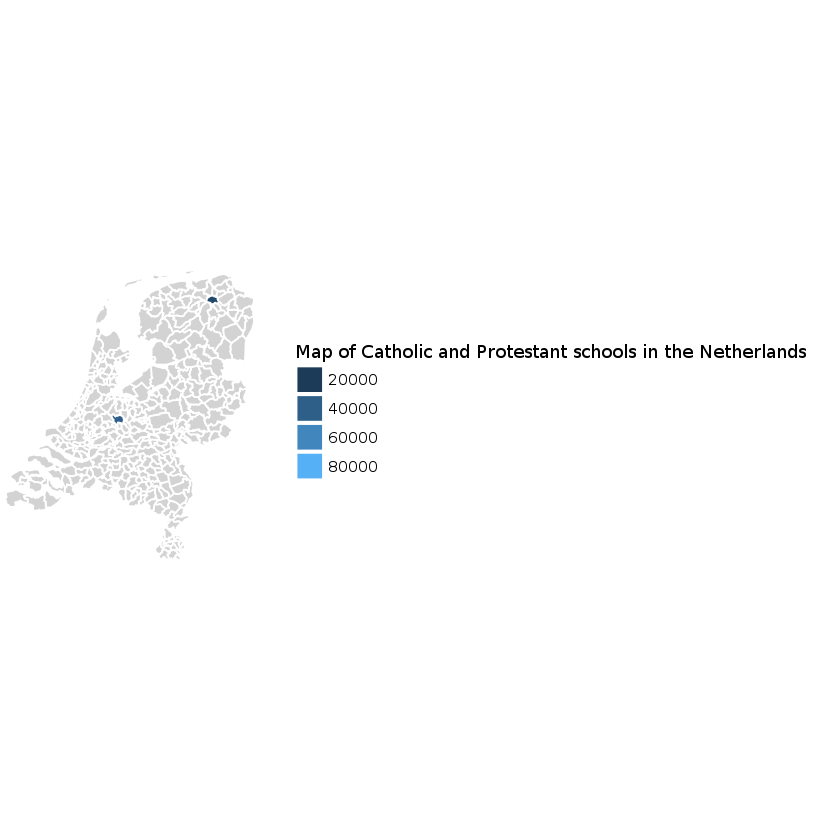

In [81]:
AddMapLayer(MapPlot(), map_municipal, schools1) +
  guides(fill = guide_legend(title = "Map of Catholic and Protestant schools in the Netherlands"))

End of notebook